<a href="https://colab.research.google.com/github/Megancodes2017/Megancodes2017/blob/main/Ben_Rice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pybaseball

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 27.6 MB/s eta 0:00:00


In [ ]:
from pybaseball import statcast_batter
from pybaseball import playerid_lookup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

playerid_lookup('Rice', 'Ben')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,rice,ben,700250,riceb001,ricebe01,-1,2024.0,2025.0


In [ ]:
ben_rice_id = 700250

data = statcast_batter('2024-06-18', '2025-06-15', ben_rice_id)

Gathering Player Data


In [ ]:
batted_balls = data[data['events'].notna()].copy()

batted_balls.columns
print(batted_balls.columns.tolist())

# Hard-hit ball: EV >= 95mph
batted_balls['hard_hit'] = batted_balls['launch_speed'] >= 95

# Barrel indicator
batted_balls['barrel'] = batted_balls['launch_angle'].between(26, 30) & batted_balls['launch_speed'].between(98, 115)

summary = {
    'Average EV': batted_balls['launch_speed'].mean(),
    'Average LA': batted_balls['launch_angle'].mean(),
    'Hard-Hit %': batted_balls['hard_hit'].mean(),
    'Barrel %': batted_balls['barrel'].mean(),
    'Max EV': batted_balls['launch_speed'].max()
}

summary_df = pd.DataFrame.from_dict(summary, orient='index', columns=['Value'])
print(summary_df)

['pitch_type', 'game_date', 'release_speed', 'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher', 'events', 'description', 'spin_dir', 'spin_rate_deprecated', 'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des', 'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type', 'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y', 'tfs_deprecated', 'tfs_zulu_deprecated', 'umpire', 'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed', 'release_spin_rate', 'release_extension', 'game_pk', 'fielder_2', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y', 'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle', 'woba_value', 'woba_denom', 'babip_value', 'iso_value', 'launch_speed_a

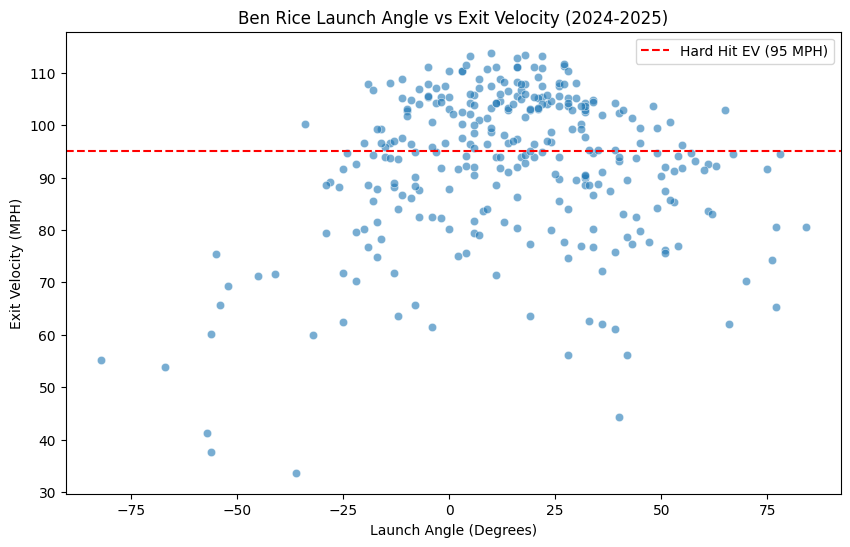

In [ ]:
# Visualize
plt.figure(figsize=(10,6))
sns.scatterplot(data=batted_balls, x='launch_angle', y='launch_speed', alpha=0.6)
plt.axhline(95, color='red', linestyle='--', label='Hard Hit EV (95 MPH)')
plt.title('Ben Rice Launch Angle vs Exit Velocity (2024-2025)')
plt.xlabel('Launch Angle (Degrees)')
plt.ylabel('Exit Velocity (MPH)')
plt.legend()
plt.show()

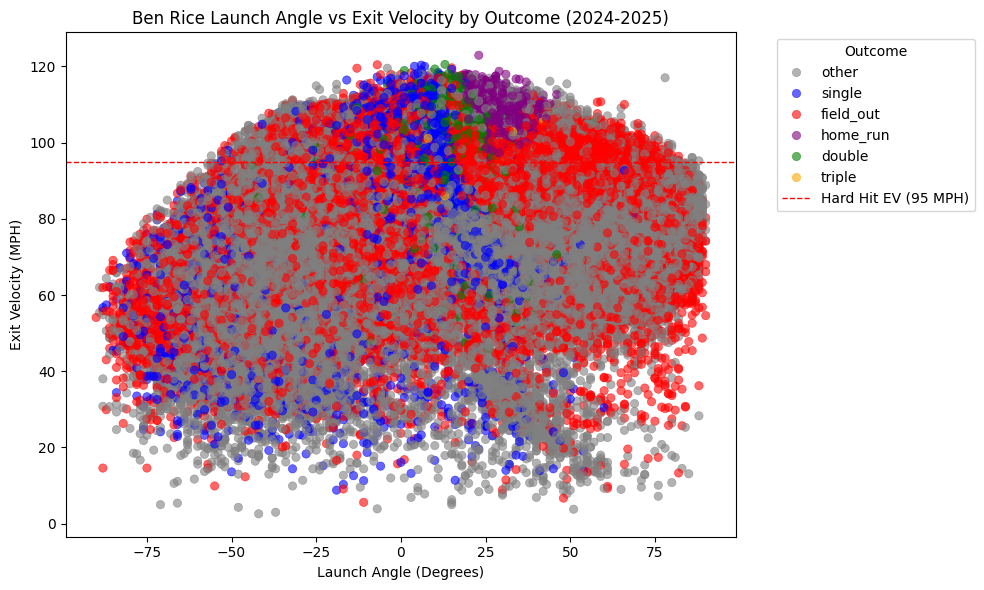

In [ ]:
outcome_order = ['field_out', 'single', 'double', 'triple', 'home_run', 'other']
color_map = {
    'field_out': 'red',
    'single': 'blue',
    'double': 'green',
    'triple': 'orange',
    'home_run': 'purple',
    'other': 'gray'
}

batted_balls['outcome'] = batted_balls['events'].fillna('other')
batted_balls['outcome'] = batted_balls['outcome'].apply(lambda x: x if x in outcome_order else 'other')

# Reset the index to avoid duplicate labels
batted_balls = batted_balls.reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=batted_balls, x='launch_angle', y='launch_speed', hue='outcome', palette=color_map, alpha=0.6, edgecolor=None)

# Hard-hit line
plt.axhline(95, color='red', linestyle='--', linewidth=1, label='Hard Hit EV (95 MPH)')
plt.title('Ben Rice Launch Angle vs Exit Velocity by Outcome (2024-2025)')
plt.xlabel('Launch Angle (Degrees)')
plt.ylabel('Exit Velocity (MPH)')
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()